In [26]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the data path where datasets are stored
datapath = "data/"

# Define the drag coefficient
Cd = 0.003

# Define the filenames for the datasets (these should be updated with the correct file paths)
A4_file = "A4/A4_lofoten_h_50km_timeseries.nc" 
lofoten800_file = "lofoten800/lofoten800_lofoten_h_50km_timeseries.nc" 

# Load the datasets using xarray
ts_A4 = xr.open_dataset(datapath + A4_file)
ts_lofoten800 = xr.open_dataset(datapath + lofoten800_file)

In [12]:
def find_Cdnod(ts, Cd):
    L = ts.L_area
    ub2 = ts.ub2circ_area.values/L
    u = ts.ucirc_area.values/L 
    
    return Cd*ub2/(u*np.abs(u))
    

In [34]:
# Load the datasets using xarray
ts_A4 = xr.open_dataset(datapath + A4_file)
ts_lofoten800 = xr.open_dataset(datapath + lofoten800_file)

# Calculate the corrected drag coefficient (Cdnod) for each dataset
Cdnod_A4 = find_Cdnod(ts_A4, Cd)
Cdnod_lofoten800 = find_Cdnod(ts_lofoten800, Cd)

# calculate mean corrected drag coefficient
Cdnod_A4_mean = np.nanmean(Cdnod_A4)
Cdnod_lofoten800_mean = np.nanmean(Cdnod_lofoten800)

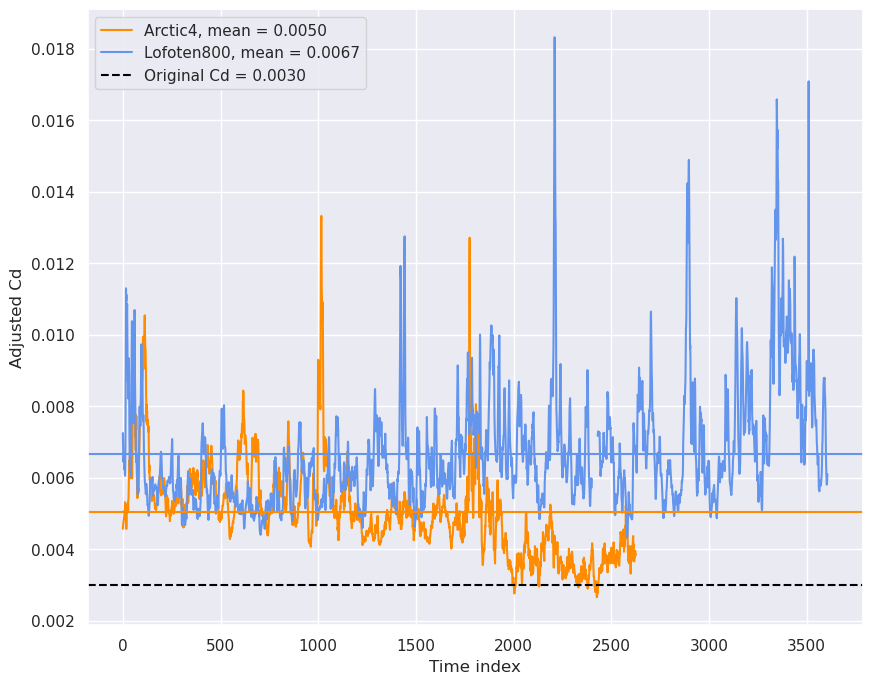

In [38]:
# Create a plot to compare the two Cdnod values
sns.set_theme("notebook")

fig, ax = plt.subplots(figsize=(10,8))


# Plot the Cdnod for both datasets
ax.plot(Cdnod_A4, label=f'Arctic4, mean = {Cdnod_A4_mean:.4f}', color="darkorange")
ax.plot(Cdnod_lofoten800, label=f'Lofoten800, mean = {Cdnod_lofoten800_mean:.4f}', color="cornflowerblue")

# Add a horizontal line to represent the mean values
ax.axhline(Cdnod_A4_mean, color="darkorange")
ax.axhline(Cdnod_lofoten800_mean, color="cornflowerblue")


# Add a horizontal line to represent the original drag coefficient Cd
ax.axhline(Cd, color='black', ls="--", label=f'Original Cd = {Cd:.4f}')

# Add labels and a legend for better clarity
ax.set_xlabel('Time index')
ax.set_ylabel('Adjusted Cd')
ax.legend()